In [2]:
import itertools    
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/andrei_c/projects/ds_env/from-scratch/src')

from BomatCourier import Bomat
from Heisenberg import binary_cross_entropy_loss, confusion_matrix
from Heimdall import stochastic_gradient_descent as sgd

In [22]:
binary_sample = pd.read_csv('../data/clf-data-binary.csv').to_numpy()

X = binary_sample[:, :4]
y = binary_sample[:, -1:]

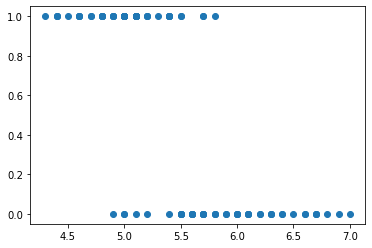

In [24]:
plt.scatter(X[:, 0], y);

In [25]:
logistic_regression = Bomat(4, initialization='zeros')
y_hat = logistic_regression.make_prediction(X)

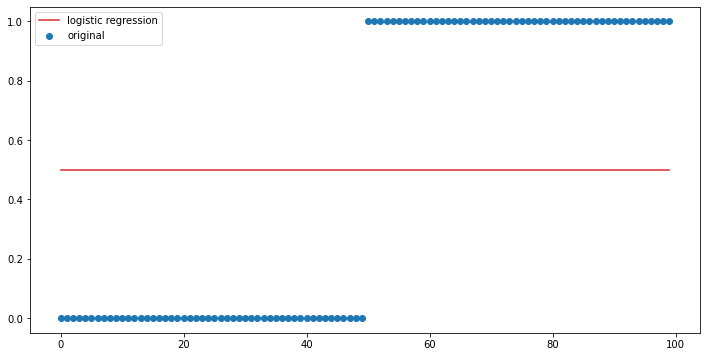

In [26]:
result = np.sort(np.concatenate([y, y_hat[:, np.newaxis]], axis=1), axis=0)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y)), result[:, 0], label='original')
plt.plot(range(len(y)), result[:, 1], label='logistic regression', c='C3')
plt.legend();

In [27]:
c, e = sgd(X, y, 
           logistic_regression, 
           logistic_regression.coefficients, 
           .01, 
           50000, 
           {'classification': None})

y_hat = logistic_regression.make_prediction(X)
decision = logistic_regression.make_decision(X)

100%|██████████| 50000/50000 [00:02<00:00, 24522.56it/s]


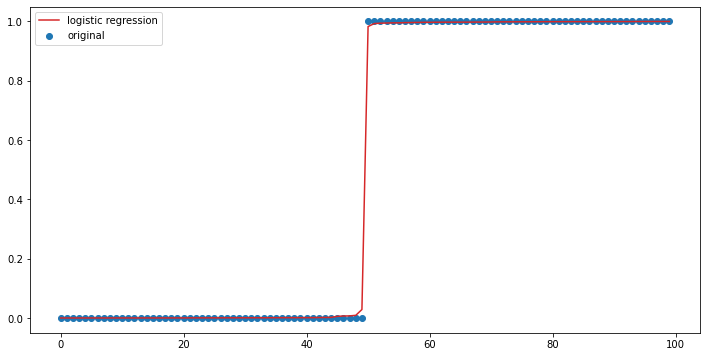

In [28]:
result = np.sort(np.concatenate([y, y_hat[:, np.newaxis]], axis=1), axis=0)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y)), result[:, 0], label='original')
plt.plot(range(len(y)), result[:, 1], label='logistic regression', c='C3')
plt.legend();

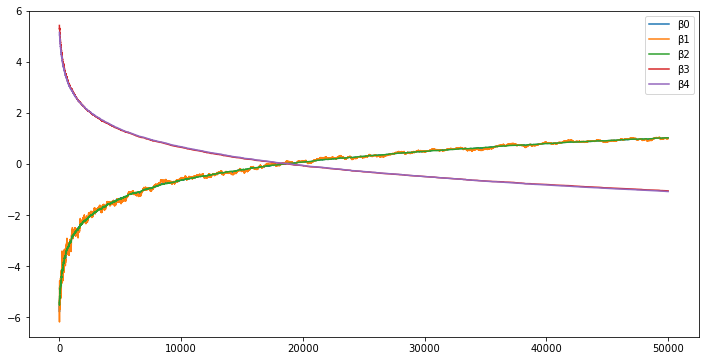

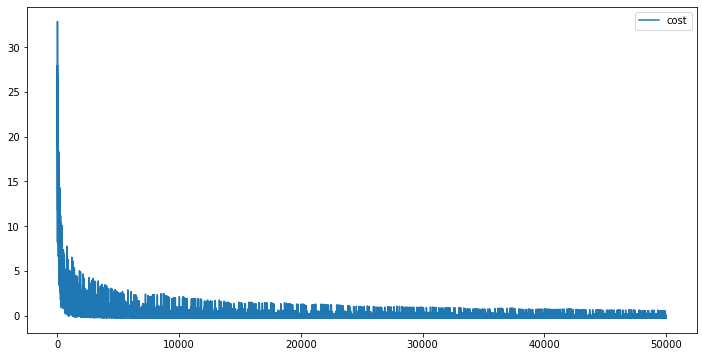

In [29]:
df = pd.DataFrame(e[1])
df = (df - df.mean())/df.std()

df.drop('cost', axis=1).plot(figsize=(12, 6))
df[['cost']].plot(figsize=(12, 6));

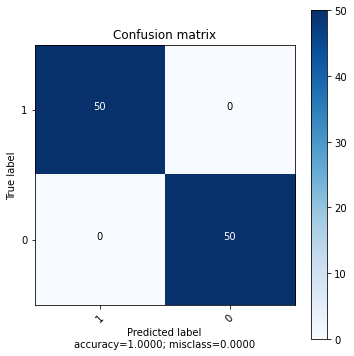

In [30]:
cm = confusion_matrix(y, decision[:, np.newaxis], normalize=False)

In [ ]:
# (1/n)*(y_hat - y)